# CPA 01 Zachary Boroda 
## Analyzing Electricty Generation Data 

#### Data source: https://www.eia.gov/electricity/data/state/annual_generation_state.xls 

This is a data set that for each state every year over the past 30 years shows the Megawatthours of electricity produced seperated by source. The sources are listed by type of energy and type of producer, but I will be focusing on the 'Total Electric Power Industry' numbers.

I converted this data to a CSV file 

### Two questions to answer: 

1) How have the sources of electricity changed over the past 30 years? 

2) How has the source of electricity changed over the past 30 years in ther lower 48 states and is this different from the entire US? 


In [1]:
import pandas as pd
import numpy as np
filename = 'annual_generation_state.xlsx - Net_Generation_1990-2020 Final.csv'

In [2]:
electric_data = pd.read_csv(filename, index_col = 'YEAR')
electric_data['GENERATION (Megawatthours)'] = pd.to_numeric(electric_data['GENERATION (Megawatthours)'].str.replace(',','', regex = False))
electric_data = electric_data[electric_data.STATE != '  ']
electric_data

,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
YEAR,,,,
1990,AK,Total Electric Power Industry,Total,5599506
1990,AK,Total Electric Power Industry,Coal,510573
1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521
1990,AK,Total Electric Power Industry,Natural Gas,3466261
1990,AK,Total Electric Power Industry,Petroleum,497116
...,...,...,...,...
2020,WY,"Electric Generators, Electric Utilities",Coal,32361811
2020,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,1075863
2020,WY,"Electric Generators, Electric Utilities",Natural Gas,647464


In [3]:
print(electric_data['TYPE OF PRODUCER'].sort_values().unique())

['Combined Heat and Power, Commercial Power'
 'Combined Heat and Power, Electric Power'
 'Combined Heat and Power, Industrial Power'
 'Electric Generators, Electric Utilities'
 'Electric Generators, Independent Power Producers'
 'Total Electric Power Industry']


In [4]:
print(electric_data['ENERGY SOURCE'].sort_values().unique())

['Coal' 'Geothermal' 'Hydroelectric Conventional' 'Natural Gas' 'Nuclear'
 'Other' 'Other Biomass' 'Other Gases' 'Petroleum' 'Pumped Storage'
 'Solar Thermal and Photovoltaic' 'Total' 'Wind'
 'Wood and Wood Derived Fuels']


In [5]:
print(electric_data['STATE'].sort_values().unique())
electric_data['STATE'] = electric_data['STATE'].str.replace('US-Total','US-TOTAL', regex = False)
# electric_data[electric_data['STATE'] == 'US-TOTAL']
print(electric_data['STATE'].sort_values().unique())

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'US-TOTAL' 'US-Total' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'US-TOTAL' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


In [6]:
electric_data.describe()

,GENERATION (Megawatthours)
count,5.588200e+04
mean,1.686078e+07
std,1.305524e+08
min,-8.823445e+06
25%,2.627000e+04
50%,3.231285e+05
75%,3.389417e+06
max,4.178277e+09


Let us plot US-TOTAL electrcity by source. 

In [7]:
ustotal = electric_data[(electric_data['STATE'] == 'US-TOTAL') & (electric_data['TYPE OF PRODUCER'] == 'Total Electric Power Industry')]
ustotal = pd.pivot_table(ustotal, values='GENERATION (Megawatthours)', columns=['ENERGY SOURCE'], index='YEAR', fill_value=0)
ustotal

ENERGY SOURCE,Coal,Geothermal,Hydroelectric Conventional,Natural Gas,Nuclear,Other,Other Biomass,Other Gases,Petroleum,Pumped Storage,Solar Thermal and Photovoltaic,Total,Wind,Wood and Wood Derived Fuels
YEAR,,,,,,,,,,,,,,
1990,1594011479,15434271,292865846,372765154,576861678,3615663,13260379,10382830,126460202,-3507741,367087,3037827337,2788600,32521889
1991,1590622748,15966444,288994189,381553017,612565087,4738849,15664746,11335593,119751573,-4541435,471765,3073798885,2950951,33725358
1992,1621206039,16137962,253088003,404074372,618776263,3719887,17816035,13270237,100154163,-4176582,399640,3083882204,2887523,36528662
1993,1690070232,16788565,280494008,414926798,610291214,3487156,18333031,12955798,112788180,-4035572,462452,3197191096,3005827,37623407
1994,1690693864,15535453,260125733,460218682,640439832,3666925,19128595,13319051,105900983,-3377825,486622,3247522388,3447109,37937364
1995,1709426468,13378258,310832748,496057945,673402123,4103808,20404971,13869951,74554065,-2725131,496821,3353487362,3164253,36521082
1996,1795195593,14328684,347162063,455055576,674728546,3571279,20911336,14355813,81411225,-3088078,521205,3444187621,3234069,36800310
1997,1845015736,14726102,356453295,479398670,628644171,3611990,21709073,13350634,92554873,-4039905,511168,3492172283,3288035,36948441
1998,1873515690,14773918,323335661,531257104,673702104,3571410,22447935,13492230,128800173,-4467280,502473,3620295498,3025696,36338384


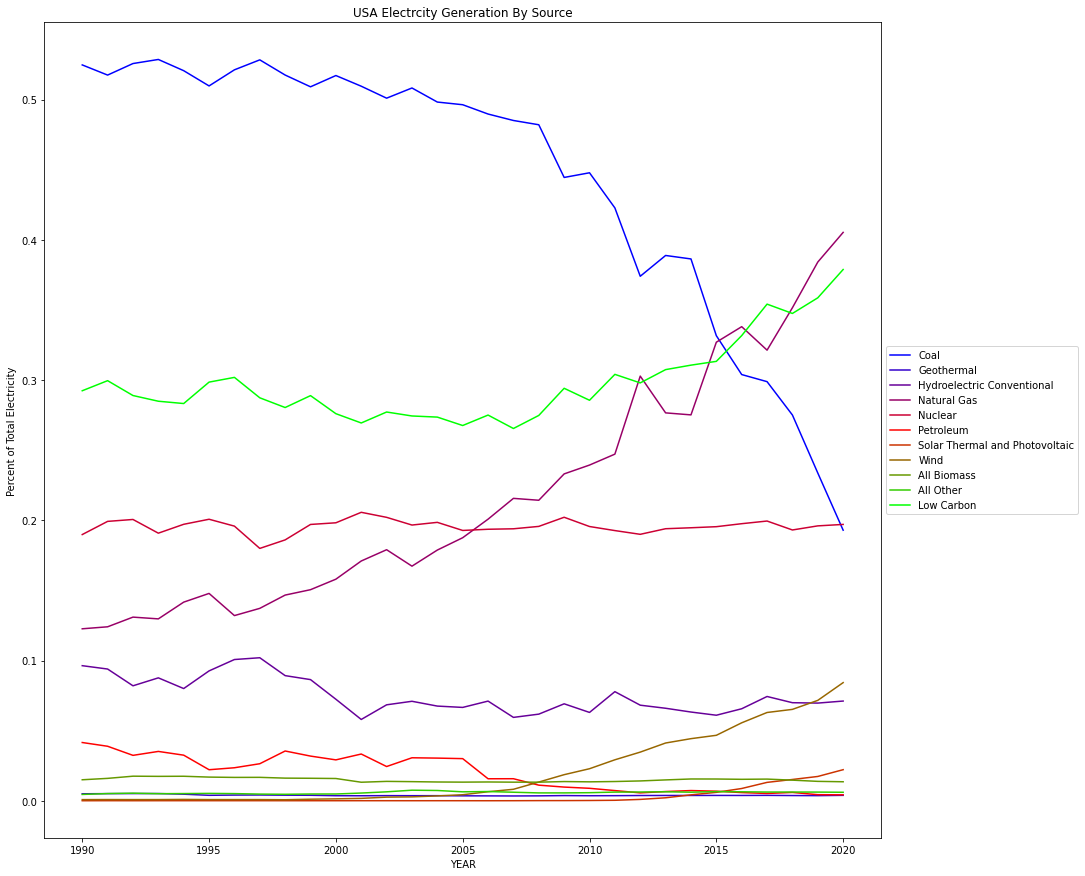

In [8]:
ustotal = ustotal.drop('Total',axis=1).div(ustotal['Total'], axis=0)
ustotal['All Biomass'] = ustotal['Wood and Wood Derived Fuels'] + ustotal['Other Biomass']
ustotal['All Other'] = ustotal['Other'] + ustotal['Other Gases']
ustotal = ustotal.drop(['Wood and Wood Derived Fuels', 'Other Biomass', 'Other Gases', 'Other', 'Pumped Storage'],axis=1)
ustotal['Low Carbon'] = ustotal['Geothermal'] + ustotal['Nuclear'] + ustotal['Solar Thermal and Photovoltaic'] + ustotal['Wind'] + ustotal['Hydroelectric Conventional'] 
#ustotal['Solar and Wind'] = ustotal['Solar Thermal and Photovoltaic'] + ustotal['Wind']
ustotal.plot(kind='line', figsize=(15,15), colormap='brg', ylabel='Percent of Total Electricity', title='USA Electrcity Generation By Source').legend(loc='center left', bbox_to_anchor=(1.0,0.5))
#ustotal

This shows how the prevalence of coal for electricty generation has steadily declined over the past 30 years. It also shows the growth of renewables and natural gas. It really makes me hopeful about the climate that Low Carbon sources of electricity generation such as Nuclear, Solar, Geothermal, and Wind have become such a large part of the energy generation landscape. 

Now let us plot this information for the lower 48 states. 

In [9]:
state_totals = electric_data[(electric_data['STATE'] != 'US-TOTAL') & (electric_data['STATE'] != 'AK') & (electric_data['STATE'] != 'HI') & (electric_data['TYPE OF PRODUCER'] == 'Total Electric Power Industry')]
state_totals = pd.pivot_table(state_totals, values='GENERATION (Megawatthours)', columns=['ENERGY SOURCE'], index=['STATE','YEAR'], fill_value=0)
state_totals = state_totals.groupby(by=["YEAR"]).sum()
state_totals

ENERGY SOURCE,Coal,Geothermal,Hydroelectric Conventional,Natural Gas,Nuclear,Other,Other Biomass,Other Gases,Petroleum,Pumped Storage,Solar Thermal and Photovoltaic,Total,Wind,Wood and Wood Derived Fuels
YEAR,,,,,,,,,,,,,,
1990,1593498528,15434271,291811808,369298893,576861678,3615662,12420369,10366665,117227229,-3507741,367087,3022525079,2759775,32370855
1991,1590094623,15966445,288027090,378233623,612565087,4738849,14841664,11284112,111523701,-4541435,471765,3059705829,2915329,33584976
1992,1620153618,16135828,252108762,400860051,618776263,3719889,16994694,13207833,91298013,-4176582,399640,3068739331,2864846,36396476
1993,1688058035,16636316,279134772,411734984,610291214,3487156,17540550,12892730,104806776,-4035572,462452,3181526132,2983883,37532836
1994,1688864260,15350136,258640899,456817508,640439832,3666926,18382193,13253330,97697427,-3377825,486622,3231446979,3426759,37798912
1995,1707336331,13143737,309362818,492678368,673402123,4101689,19752860,13800643,66254503,-2725131,496821,3337157248,3143897,36408589
1996,1793123755,14086699,345792167,451506862,674728546,3571280,20307593,14295447,72677438,-3088078,521205,3427430857,3211542,36696401
1997,1842998306,14480712,355239010,475690933,628644171,3611988,21097867,13285252,84007841,-4039905,511168,3475705189,3272004,36905842
1998,1871556209,14536835,322101059,527904213,673702104,3571410,21943874,13431785,120112628,-4467280,502473,3604238567,3006414,36336843


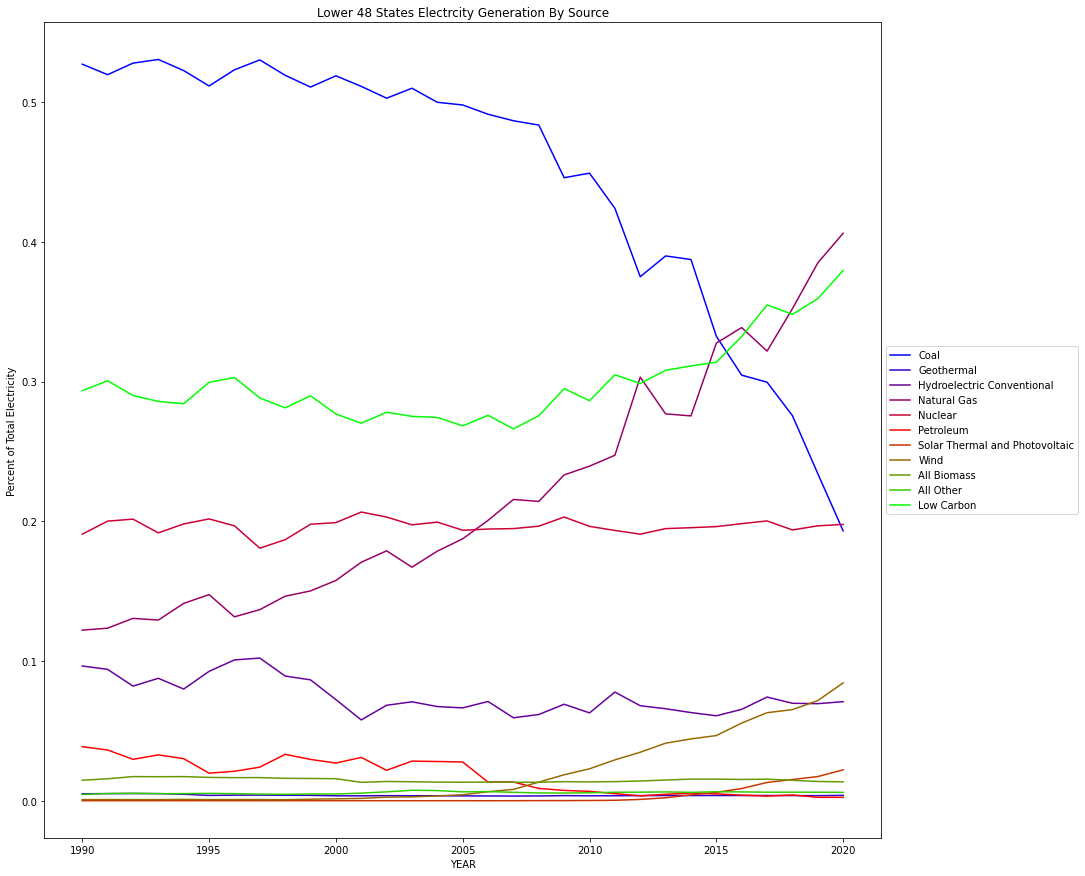

In [10]:
state_totals = state_totals.drop('Total',axis=1).div(state_totals['Total'], axis=0)
state_totals['All Biomass'] = state_totals['Wood and Wood Derived Fuels'] + state_totals['Other Biomass']
state_totals['All Other'] = state_totals['Other'] + state_totals['Other Gases']
state_totals = state_totals.drop(['Wood and Wood Derived Fuels', 'Other Biomass', 'Other Gases', 'Other', 'Pumped Storage'],axis=1)
state_totals['Low Carbon'] = state_totals['Geothermal'] + state_totals['Nuclear'] + state_totals['Solar Thermal and Photovoltaic'] + state_totals['Wind'] + state_totals['Hydroelectric Conventional'] 
state_totals.plot(kind='line', figsize=(15,15), colormap='brg', ylabel='Percent of Total Electricity', title='Lower 48 States Electrcity Generation By Source').legend(loc='center left', bbox_to_anchor=(1.0,0.5))
#ustotal

We see there is very little difference in this graph as opposed to the one above. This makes sence since Alaska and Hawaii are really a small fraction of the entire United States. The one difference that we do clearly see is that the amount of electrcity generated from petroleum is lower in the lower 48 states than it is in the entire United States. 